# Analysis Traffic Flow Dataset 

This is a  traffic volume dataset, traffic volume is measured every 15 minutes at 36 sensor locations along two major highways in Northern Virginia/Washington D.C. capital region. The 47 features include: 1) the historical sequence of traffic volume sensed during the 10 most recent sample points (10 features), 2) week day (7 features), 3) hour of day (24 features), 4) road direction (4 features), 5) number of lanes (1 feature), and 6) name of the road (1 feature). The goal is to predict the traffic volume 15 minutes into the future for all sensor locations. With a given road network, we know the spatial connectivity between sensor locations.

<b> Importing Packages </b>

In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import scipy.sparse

# for plotting

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler



<b> Loading and formatting of dataset </b>

In [74]:
traffic_dict = loadmat("C:/Users/TANISH/Downloads/traffic_dataset.mat")
print(traffic_dict)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Mar 14 15:49:14 2020', '__version__': '1.0', '__globals__': [], 'tra_X_tr': array([[<36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        ...,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>]],
      dtype=object), 'tra_X_te':

In [75]:
list_tra_X_tr = []
list_tra_Y_tr = []


for i in range(len(traffic_dict['tra_X_tr'][0])):
      list_tra_X_tr.append(traffic_dict['tra_X_tr'][0][i].toarray())


for i in range(len(traffic_dict['tra_Y_tr'])):
    list_tra_Y_tr.append(traffic_dict['tra_Y_tr'][i])

In [76]:
a = []
b = []
c = []
d = []


for i in (range(len(list_tra_Y_tr[0]))):   # i = 1261 continious quarter-hours (0 to 1260)
    for j in (range(len(list_tra_Y_tr))):  # j = 36 spatial locations (0 to 35)
        a.append(i)
        b.append(j)
        c.append(list_tra_X_tr[i][j])
        d.append(list_tra_Y_tr[j][i])
        
        

train_ds = list(zip(a,b,c,d))
column_df = ['quarter_hour','spatial_location','input_matrix','traffic_flow']

df_train_ds = pd.DataFrame(train_ds,columns=column_df)



df_train_ds[[f'feature_{i}' for i in range(0,48)]]=pd.DataFrame(df_train_ds["input_matrix"].tolist(), index = df_train_ds.index)        
df_train_ds = df_train_ds.drop('input_matrix', axis=1)

df_train_ds_original = df_train_ds


df_train_ds.describe()

,quarter_hour,spatial_location,traffic_flow,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47
count,45396.00000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,...,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000
mean,630.00000,17.500000,0.304270,0.303292,0.303242,0.303202,0.303184,0.303190,0.303224,0.303294,...,0.041237,3.527778,0.222222,0.388889,0.111111,0.277778,0.416667,0.305556,0.138889,0.138889
std,364.02324,10.388409,0.199580,0.199572,0.199618,0.199655,0.199674,0.199673,0.199654,0.199620,...,0.198840,0.832879,0.415744,0.487503,0.314273,0.447908,0.493012,0.460647,0.345834,0.345834
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,315.00000,8.750000,0.126576,0.125175,0.124708,0.124708,0.124708,0.124708,0.124708,0.124708,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,630.00000,17.500000,0.293321,0.292387,0.292387,0.292387,0.292387,0.292387,0.292387,0.292387,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,945.00000,26.250000,0.442784,0.442317,0.442317,0.442317,0.442317,0.442317,0.442317,0.442317,...,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1260.00000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering

In [77]:
df_train_ds.describe()

,quarter_hour,spatial_location,traffic_flow,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47
count,45396.00000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,...,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000,45396.000000
mean,630.00000,17.500000,0.304270,0.303292,0.303242,0.303202,0.303184,0.303190,0.303224,0.303294,...,0.041237,3.527778,0.222222,0.388889,0.111111,0.277778,0.416667,0.305556,0.138889,0.138889
std,364.02324,10.388409,0.199580,0.199572,0.199618,0.199655,0.199674,0.199673,0.199654,0.199620,...,0.198840,0.832879,0.415744,0.487503,0.314273,0.447908,0.493012,0.460647,0.345834,0.345834
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,315.00000,8.750000,0.126576,0.125175,0.124708,0.124708,0.124708,0.124708,0.124708,0.124708,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,630.00000,17.500000,0.293321,0.292387,0.292387,0.292387,0.292387,0.292387,0.292387,0.292387,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,945.00000,26.250000,0.442784,0.442317,0.442317,0.442317,0.442317,0.442317,0.442317,0.442317,...,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1260.00000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df_train_ds.info()
df_train_ds.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45396 entries, 0 to 45395
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quarter_hour      45396 non-null  int64  
 1   spatial_location  45396 non-null  int64  
 2   traffic_flow      45396 non-null  float64
 3   feature_0         45396 non-null  float64
 4   feature_1         45396 non-null  float64
 5   feature_2         45396 non-null  float64
 6   feature_3         45396 non-null  float64
 7   feature_4         45396 non-null  float64
 8   feature_5         45396 non-null  float64
 9   feature_6         45396 non-null  float64
 10  feature_7         45396 non-null  float64
 11  feature_8         45396 non-null  float64
 12  feature_9         45396 non-null  float64
 13  feature_10        45396 non-null  float64
 14  feature_11        45396 non-null  float64
 15  feature_12        45396 non-null  float64
 16  feature_13        45396 non-null  float6

Index(['quarter_hour', 'spatial_location', 'traffic_flow', 'feature_0',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47'],
      dtype='object')

<b> Discrete Variables </b>

To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number ( < 20) of distinct values as below:

In [79]:
variables = [var for var in df_train_ds.columns]

dis_var = []

for var in variables:
    if len(df_train_ds[var].unique()) < 20:
        print(var, ' values: ', df_train_ds[var].unique())
        dis_var.append(var)


feature_10  values:  [1. 0.]
feature_11  values:  [0. 1.]
feature_12  values:  [0. 1.]
feature_13  values:  [0. 1.]
feature_14  values:  [0. 1.]
feature_15  values:  [1. 0.]
feature_16  values:  [0. 1.]
feature_17  values:  [0. 1.]
feature_18  values:  [0. 1.]
feature_19  values:  [0. 1.]
feature_20  values:  [0. 1.]
feature_21  values:  [0. 1.]
feature_22  values:  [0. 1.]
feature_23  values:  [0. 1.]
feature_24  values:  [0. 1.]
feature_25  values:  [0. 1.]
feature_26  values:  [0. 1.]
feature_27  values:  [0. 1.]
feature_28  values:  [0. 1.]
feature_29  values:  [0. 1.]
feature_30  values:  [0. 1.]
feature_31  values:  [0. 1.]
feature_32  values:  [0. 1.]
feature_33  values:  [0. 1.]
feature_34  values:  [0. 1.]
feature_35  values:  [0. 1.]
feature_36  values:  [0. 1.]
feature_37  values:  [0. 1.]
feature_38  values:  [0. 1.]
feature_39  values:  [3. 4. 5. 2. 1.]
feature_40  values:  [1. 0.]
feature_41  values:  [0. 1.]
feature_42  values:  [0. 1.]
feature_43  values:  [0. 1.]
featu

<b> Continuous variables </b>

In [80]:
continuous_var = [var for var in variables if var not in dis_var]
print('There are {} numerical and continous variables'.format(len(continuous_var)))
print(continuous_var)


There are 13 numerical and continous variables
['quarter_hour', 'spatial_location', 'traffic_flow', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


# Types of problem within the vaiables

Missing values and duplicate values

In [81]:
# Count of column wise NA/Missing values

count = 0
for var in df_train_ds.columns:
    if df_train_ds[var].isnull().sum()>0:
        count = count +1

print('No of Columns with missing values :',count)

No of Columns with missing values : 0


In [82]:
# Count number of duplicated Rows

duplicate_row_count = df_train_ds.duplicated().sum()
print('No of Duplicate Rows :',duplicate_row_count)

No of Duplicate Rows : 0


<b> Outliers and distribution in continuous variables <b>

In [83]:
# Created boxplots to visualise outliers in continuous variables & histograms to get an idea of its distribution

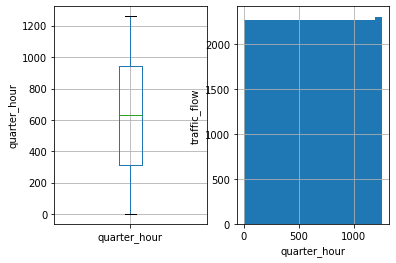

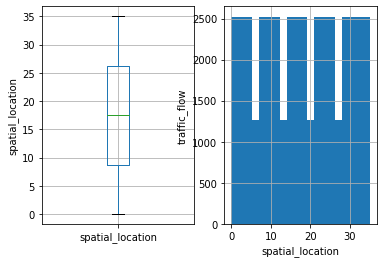

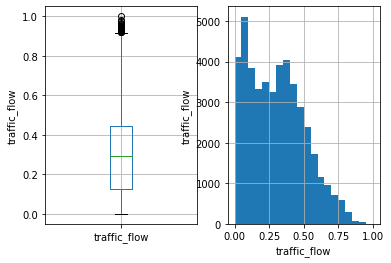

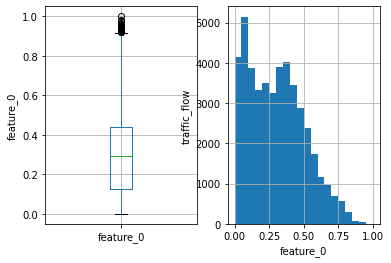

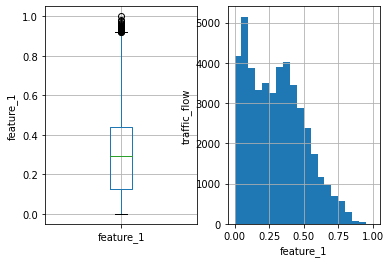

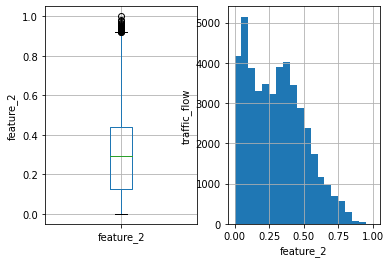

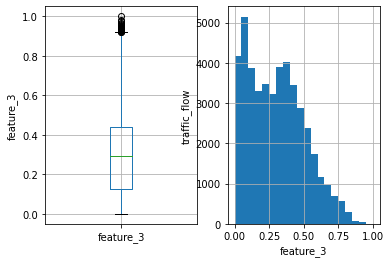

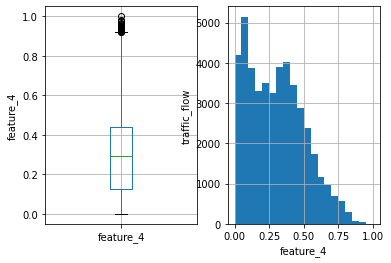

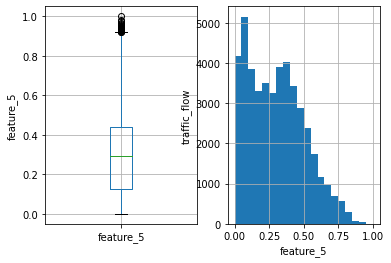

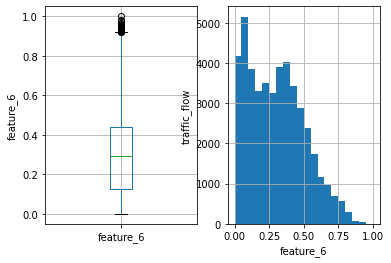

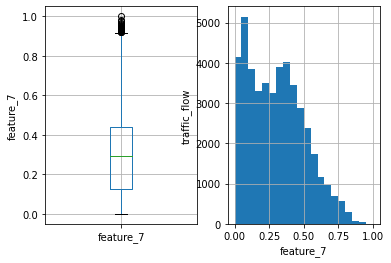

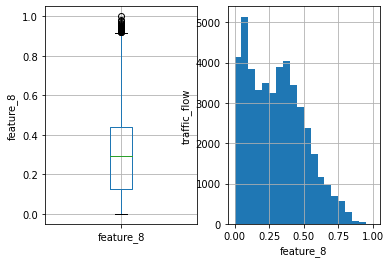

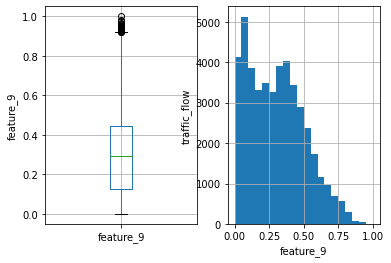

In [84]:
for var in continuous_var:
    
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    df_train_ds.boxplot(column = var)
    plt.ylabel(var)
    plt.show
    
    plt.subplot(1,2,2)
    fig = df_train_ds[var].hist(bins=20)
    fig.set_ylabel('traffic_flow')
    fig.set_xlabel(var)

    plt.show()
    

The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. 

<b> Analysis of Variables </b>

feature_0    Distinct Values:  1901    Data Type:  float64
feature_1    Distinct Values:  1901    Data Type:  float64
feature_2    Distinct Values:  1901    Data Type:  float64
feature_3    Distinct Values:  1901    Data Type:  float64
feature_4    Distinct Values:  1901    Data Type:  float64
feature_5    Distinct Values:  1901    Data Type:  float64
feature_6    Distinct Values:  1901    Data Type:  float64
feature_7    Distinct Values:  1901    Data Type:  float64
feature_8    Distinct Values:  1901    Data Type:  float64
feature_9    Distinct Values:  1901    Data Type:  float64


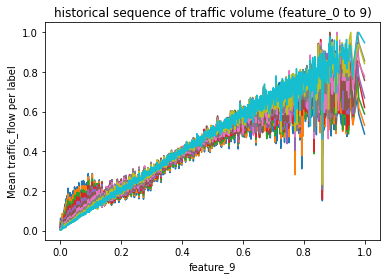

In [85]:
# historical sequence of traffic volume sensed during the 10 most recent sample points (10 features)

historical_seq_traffic_vol = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


for var in historical_seq_traffic_vol:
    print(var, '   Distinct Values: ', len(df_train_ds[var].unique()),'   Data Type: ', df_train_ds[var].dtypes)
      
    df_train_ds.groupby(var)['traffic_flow'].mean().plot()
    
plt.ylabel('Mean traffic_flow per label')
plt.title('historical sequence of traffic volume (feature_0 to 9)')    
plt.show()

From above plot, it's clear that strong correlation exists among these 10 historical sequence of traffic volume (feature_0 to 9). Approach to combine (mean) these 10 features to a single feature can be followed.

feature_10    Distinct Values:  2 [1. 0.]    Data Type:  float64
feature_11    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_12    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_13    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_14    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_15    Distinct Values:  2 [1. 0.]    Data Type:  float64
feature_16    Distinct Values:  2 [0. 1.]    Data Type:  float64


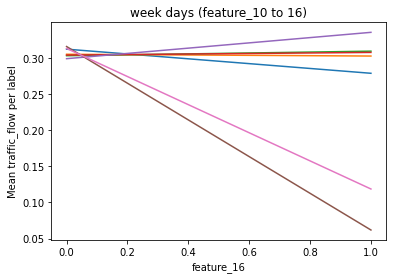

In [86]:
# week day (7 features)

week_days = ['feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16']

for var in week_days:
    print(var, '   Distinct Values: ', len(df_train_ds[var].unique()),df_train_ds[var].unique(),'   Data Type: ', df_train_ds[var].dtypes)
      
    df_train_ds.groupby(var)['traffic_flow'].mean().plot()
    
plt.ylabel('Mean traffic_flow per label')
plt.title('week days (feature_10 to 16)')    
plt.show()

From above plot, 5 of week day (7 features) tend to affect traffic flow in similar manner to some extent. May be these 5 days are weekdays when traffic pressure is high & remaining 2 days are weekends when traffic pressure is low due to holidays.

feature_17    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_18    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_19    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_20    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_21    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_22    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_23    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_24    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_25    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_26    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_27    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_28    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_29    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_30    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_31    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_32    Distinct Va

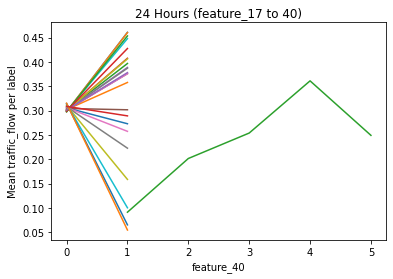

In [87]:
# hour of day (24 features)

hours_24 = ['feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
            'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
            'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
            'feature_38', 'feature_39', 'feature_40']

for var in hours_24:
    print(var, '   Distinct Values: ', len(df_train_ds[var].unique()),df_train_ds[var].unique(),'   Data Type: ', df_train_ds[var].dtypes)
      
    df_train_ds.groupby(var)['traffic_flow'].mean().plot()
    
plt.ylabel('Mean traffic_flow per label')
plt.title('24 Hours (feature_17 to 40)')    
plt.show()

From above plot, no trend can be found for 24 Hours (feature_17 to 40).

feature_39 (23 rd Hour) also contains value of 3, 4 & 5 as compared to 0,1 for other hours. Value of 3, 4 & 5 (values are absurd) might be outlier/noise for feature_39. We can drop feature_39 as it contains noise & does not signify hour feature. Instead, we will include feature_41 as hour feature.

feature_17    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_18    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_19    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_20    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_21    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_22    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_23    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_24    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_25    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_26    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_27    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_28    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_29    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_30    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_31    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_32    Distinct Va

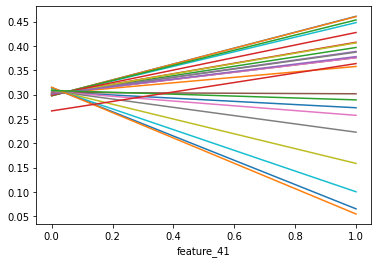

In [88]:
# new hour feature of day (24 features) -- feature_39 is dropped & replaced by feature_41

hours_24 = ['feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
            'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
            'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
            'feature_38', 'feature_40', 'feature_41']

for var in hours_24:
    print(var, '   Distinct Values: ', len(df_train_ds[var].unique()),df_train_ds[var].unique(),'   Data Type: ', df_train_ds[var].dtypes)
      
    df_train_ds.groupby(var)['traffic_flow'].mean().plot()

feature_42    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_43    Distinct Values:  2 [0. 1.]    Data Type:  float64
feature_44    Distinct Values:  2 [1. 0.]    Data Type:  float64
feature_45    Distinct Values:  2 [0. 1.]    Data Type:  float64


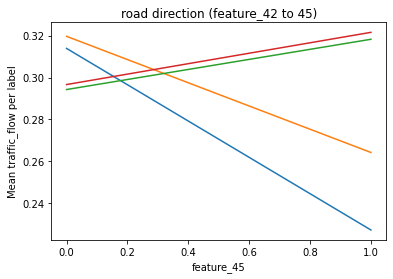

In [89]:
# road direction (4 features)
road_direction = ['feature_42', 'feature_43', 'feature_44', 'feature_45']

for var in road_direction:
    print(var, '   Distinct Values: ', len(df_train_ds[var].unique()), df_train_ds[var].unique(),'   Data Type: ', df_train_ds[var].dtypes)
      
    df_train_ds.groupby(var)['traffic_flow'].mean().plot()
    
plt.ylabel('Mean traffic_flow per label')
plt.title('road direction (feature_42 to 45)')    
plt.show()

From above plot, no trend/relation found among 4 road direction (feature_42 to 45).

['feature_46']    Distinct Values:  2 [0. 1.]    Data Type:  float64


<AxesSubplot: xlabel='feature_46'>

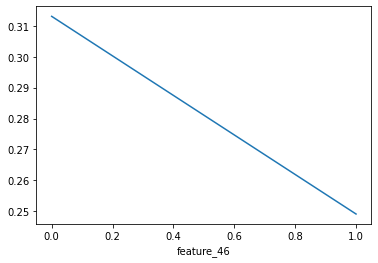

In [90]:
# number of lanes (1 feature)

no_of_lanes = ['feature_46']


print(no_of_lanes, '   Distinct Values: ', len(df_train_ds['feature_46'].unique()), df_train_ds['feature_46'].unique(),'   Data Type: ', df_train_ds['feature_46'].dtypes)
df_train_ds.groupby(no_of_lanes)['traffic_flow'].mean().plot()
    

No specific observation for number of lanes (feature_46)

['feature_47']    Distinct Values:  2 [0. 1.]    Data Type:  float64


<AxesSubplot: xlabel='feature_46'>

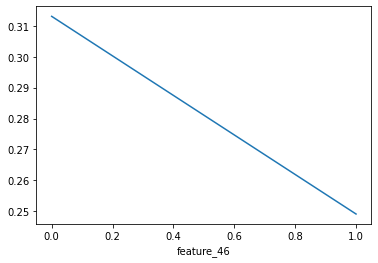

In [91]:
# name of the road (1 feature)

name_of_road = ['feature_47']


print(name_of_road, '   Distinct Values: ', len(df_train_ds['feature_47'].unique()), df_train_ds['feature_47'].unique(),'   Data Type: ', df_train_ds['feature_47'].dtypes)
df_train_ds.groupby(no_of_lanes)['traffic_flow'].mean().plot()

No specific observation for name of the road (feature_47)

Training & Testing DataSet

In [92]:
y_train = df_train_ds['traffic_flow']
x_train = df_train_ds.drop(['traffic_flow'], axis=1)

<b> Feature Scaling </b>

In [93]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
print(x_train_scaled)

[[-1.7306778  -1.68458833 -1.05633482 ... -0.66332496 -0.40160966
  -0.40160966]
 [-1.7306778  -1.58832614 -1.03293085 ... -0.66332496 -0.40160966
  -0.40160966]
 [-1.7306778  -1.49206395 -0.94165537 ... -0.66332496 -0.40160966
  -0.40160966]
 ...
 [ 1.7306778   1.49206395 -1.34888443 ... -0.66332496 -0.40160966
   2.48997992]
 [ 1.7306778   1.58832614 -1.29973609 ... -0.66332496 -0.40160966
   2.48997992]
 [ 1.7306778   1.68458833 -1.16867387 ... -0.66332496  2.48997992
  -0.40160966]]
